Market Basket Analysis is a technique which identifies the strength of association between pairs of products purchased together and identify patterns of co-occurrence. 

Market Basket Analysis creates If-Then scenario rules, for example, if item A is purchased then item B is likely to be purchased. The rules are probabilistic in nature or, in other words, they are derived from the frequencies of co-occurrence in the observations. Frequency is the proportion of baskets that contain the items of interest.

The rules can be used in pricing strategies, product placement, and various types of cross-selling strategies.

Market Basket analysis is particularly useful for physical retail stores as it can help in planning floor space and product placement amongst many other benefits.

In this project, the recommendation using Apriori and FP Growth will be demonstrated over a large dataset.

Lastly the comparison of both algorithms will be made and also which algorithm to be used under which situation will be described

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#import seaborn as sns 
import warnings
import matplotlib as mpl
%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [3]:
#from IPython.display import display
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

## Exploratory Data Analysis (EDA)

In [4]:
df=pd.read_csv('Supermart.csv')

In [5]:
df.shape

(269720, 74)

In [6]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,...,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,...,Bellingham,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973
1,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,...,Bellingham,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973
2,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,...,Bellingham,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,...,Bellingham,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973
4,483,371,4382,2,3.88,1.7072,2,Anacortes,WA,USA,...,Bellingham,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973


## Data Exploration

In [7]:
df.describe()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,customer_region_id,total_children,num_children_at_home,...,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_district_id,the_year,the_month,day_of_month,day_since_epoch
count,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,...,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000
mean,783.862873,800.004990,5119.390405,12.753730,6.542142,2.618622,3.090201,57.723454,2.535351,0.816091,...,0.623484,0.295265,0.614471,0.553111,0.594839,120.811319,1997.678048,6.661100,15.109970,34402.004990
std,447.926131,201.955563,2901.883077,6.349746,3.461318,1.452805,0.835554,29.973844,1.490679,1.292423,...,0.484513,0.456163,0.486721,0.497172,0.490924,6.222520,0.467226,3.514326,8.319021,201.955563
min,1.000000,367.000000,3.000000,1.000000,0.500000,0.153000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,1997.000000,1.000000,1.000000,33969.000000
25%,396.000000,657.000000,2570.000000,7.000000,3.810000,1.498000,3.000000,26.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,116.000000,1997.000000,4.000000,8.000000,34259.000000
50%,787.000000,830.000000,5090.000000,13.000000,5.940000,2.386500,3.000000,66.000000,3.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,120.000000,1998.000000,7.000000,15.000000,34432.000000
75%,1174.000000,968.000000,7614.000000,17.000000,8.670000,3.486000,4.000000,85.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,125.000000,1998.000000,10.000000,22.000000,34570.000000
max,1559.000000,1095.000000,10281.000000,24.000000,23.640000,10.290000,6.000000,109.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,133.000000,1998.000000,12.000000,30.000000,34697.000000


Let's include categorical features also in description

In [8]:
df.describe(include='all')

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,...,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
count,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720,269720,269720,...,269720,269720,269720,269720.000000,269720,269720,269720.000000,269720.000000,269720.000000,269720.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107,12,3,...,21,7,3,NaN,673,7,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hidalgo,WA,USA,...,Los Angeles,North West,USA,NaN,07-12-1998,Thursday,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16684,86855,180823,...,31501,130006,180823,NaN,1377,40685,NaN,NaN,NaN,NaN
mean,783.862873,800.004990,5119.390405,12.753730,6.542142,2.618622,3.090201,NaN,NaN,NaN,...,NaN,NaN,NaN,120.811319,NaN,NaN,1997.678048,6.661100,15.109970,34402.004990
std,447.926131,201.955563,2901.883077,6.349746,3.461318,1.452805,0.835554,NaN,NaN,NaN,...,NaN,NaN,NaN,6.222520,NaN,NaN,0.467226,3.514326,8.319021,201.955563
min,1.000000,367.000000,3.000000,1.000000,0.500000,0.153000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,110.000000,NaN,NaN,1997.000000,1.000000,1.000000,33969.000000
25%,396.000000,657.000000,2570.000000,7.000000,3.810000,1.498000,3.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,116.000000,NaN,NaN,1997.000000,4.000000,8.000000,34259.000000
50%,787.000000,830.000000,5090.000000,13.000000,5.940000,2.386500,3.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,120.000000,NaN,NaN,1998.000000,7.000000,15.000000,34432.000000
75%,1174.000000,968.000000,7614.000000,17.000000,8.670000,3.486000,4.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,125.000000,NaN,NaN,1998.000000,10.000000,22.000000,34570.000000


In [9]:
df.isnull().sum()

product_id         0
time_id            0
customer_id        0
store_id           0
store_sales        0
                  ..
the_day            0
the_year           0
the_month          0
day_of_month       0
day_since_epoch    0
Length: 74, dtype: int64

In [10]:
df.dtypes

product_id           int64
time_id              int64
customer_id          int64
store_id             int64
store_sales        float64
                    ...   
the_day             object
the_year             int64
the_month            int64
day_of_month         int64
day_since_epoch      int64
Length: 74, dtype: object

There is no missing value, also the data type seems to be fine

#### For further analysis lets identify the unique values for different varibales

In [11]:
temp_table = pd.DataFrame(index=df.columns)
temp_table['data_type']=df.dtypes
temp_table['unique_count']=df.nunique()
temp_table

,data_type,unique_count
product_id,int64,1559
time_id,int64,673
customer_id,int64,8842
store_id,int64,24
store_sales,float64,1069
...,...,...
the_day,object,7
the_year,int64,2
the_month,int64,12
day_of_month,int64,30


### Univariate Analysis

Histograms



Frequency plot of store

Text(0.5, 0, 'store_id')

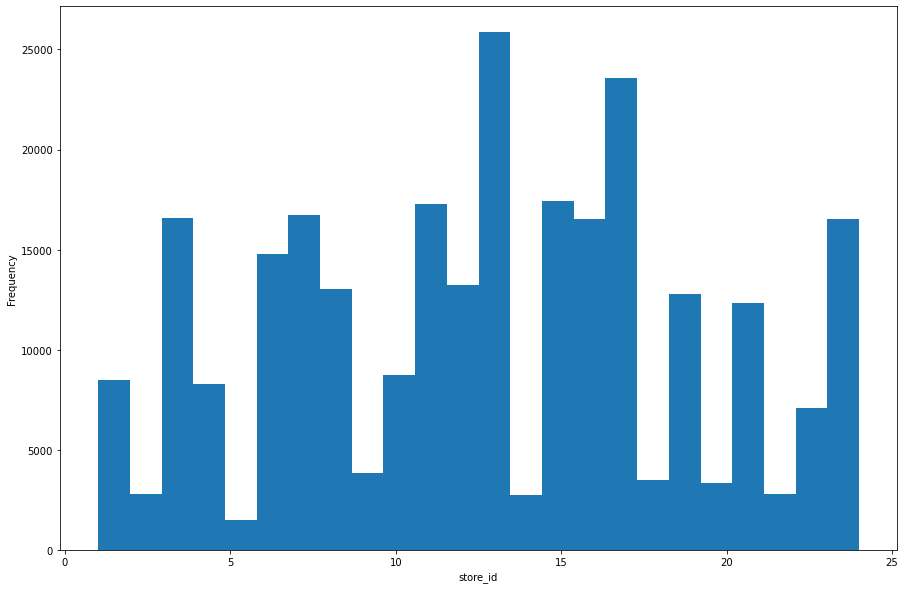

In [12]:
fig=plt.figure(figsize=(15,10))
df['store_id'].plot.hist(bins = 24)
plt.xlabel('store_id')

Here we can see, few stores registers more sales, while some registers low sales also, which may be due to different store size

Frequency plot of product_class_id

Text(0.5, 0, 'product_class_id')

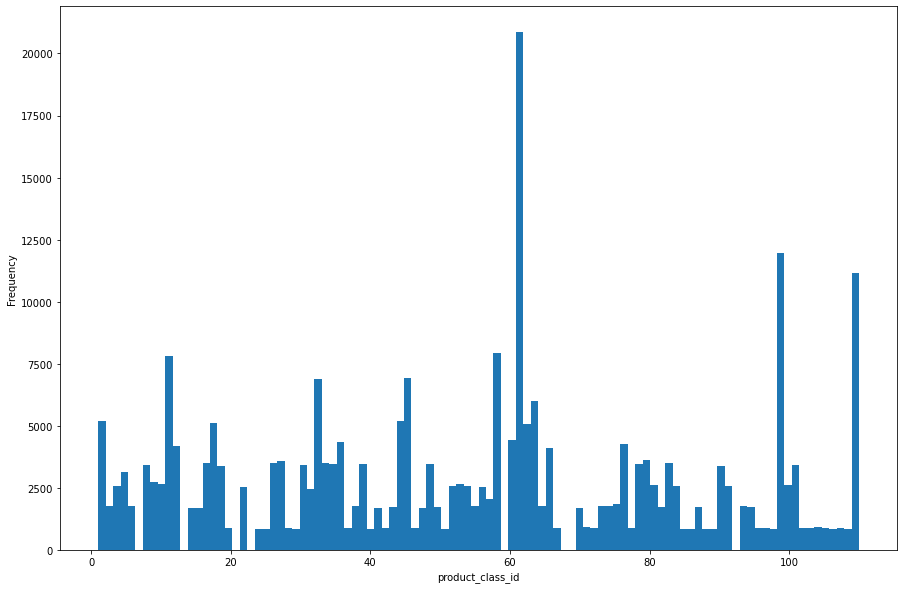

In [13]:
fig=plt.figure(figsize=(15,10))
df['product_class_id'].plot.hist(bins = 102)
plt.xlabel('product_class_id')

One product class id registers highest sell, while other registers average sales, while few records for very low sales, which further needed to be explored

Frequency Plot Of Product Id

Text(0.5, 0, 'product id')

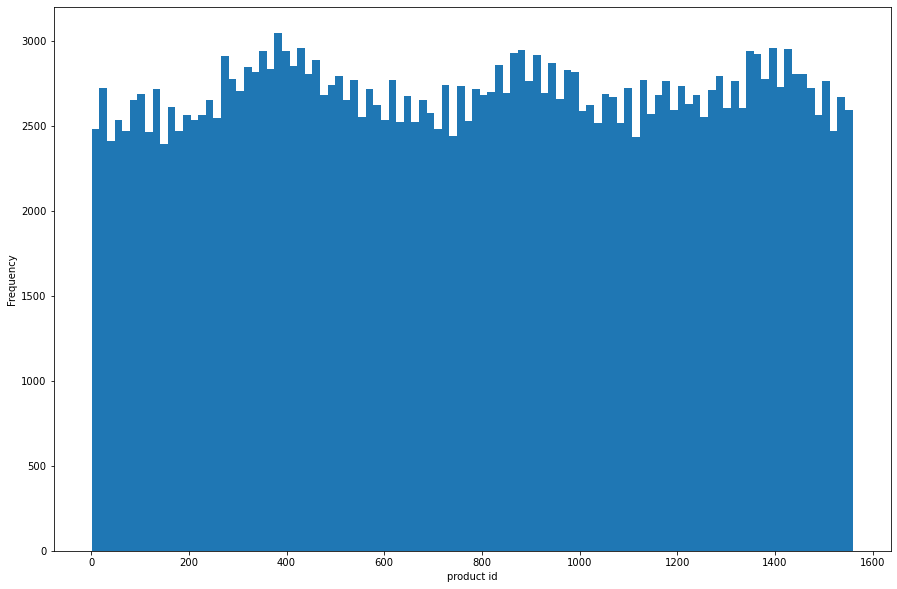

In [14]:
fig=plt.figure(figsize=(15,10))
df['product_id'].plot.hist(bins = 100)
plt.xlabel('product id')

Looking at individual sales of products, sales distribution seems to be uniform

Frequency Plot Of Unit Sales

Text(0.5, 0, 'Unit Sales')

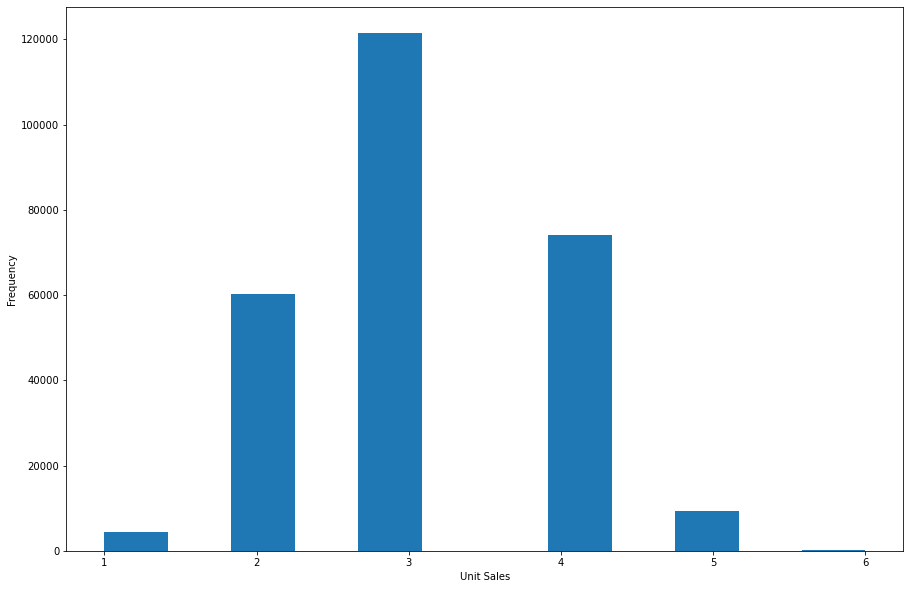

In [15]:
fig=plt.figure(figsize=(15,10))
df['unit_sales'].plot.hist(bins = 12)
plt.xlabel('Unit Sales')

This represents the no of units thats have been sold for the product, here we can see mostly people buys 3 of a kind, followed by 4 and 2, while chances of buying a single product and 6 products are rare 

### Lets Explore the seasonal buying behaviour

Month

Text(0.5, 0, 'Month')

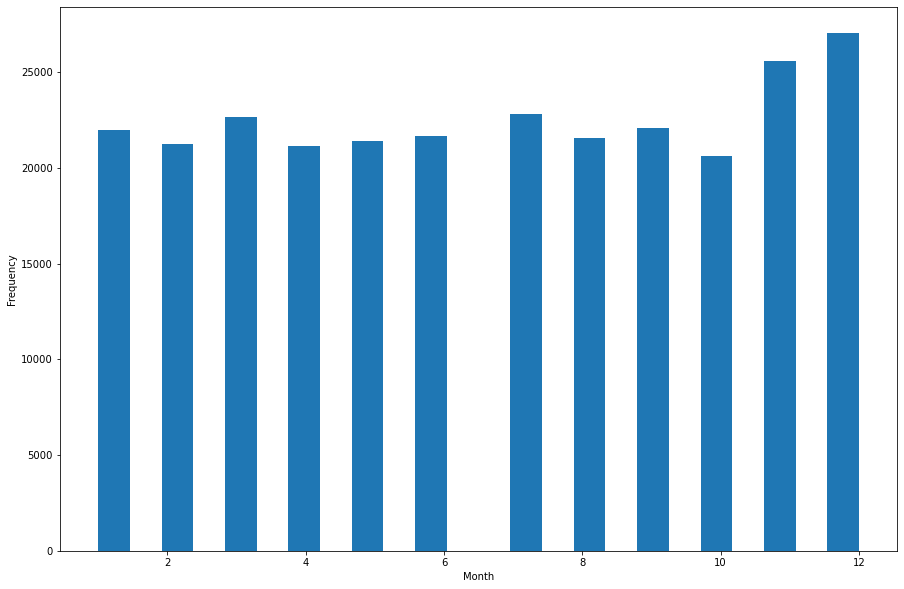

In [16]:
fig=plt.figure(figsize=(15,10))
df['the_month'].plot.hist(bins=24)
plt.xlabel('Month')

During the months of November and December, the sales seems to be marginally high, may be due to holidays

Day Of Month

Text(0.5, 0, 'Day of month')

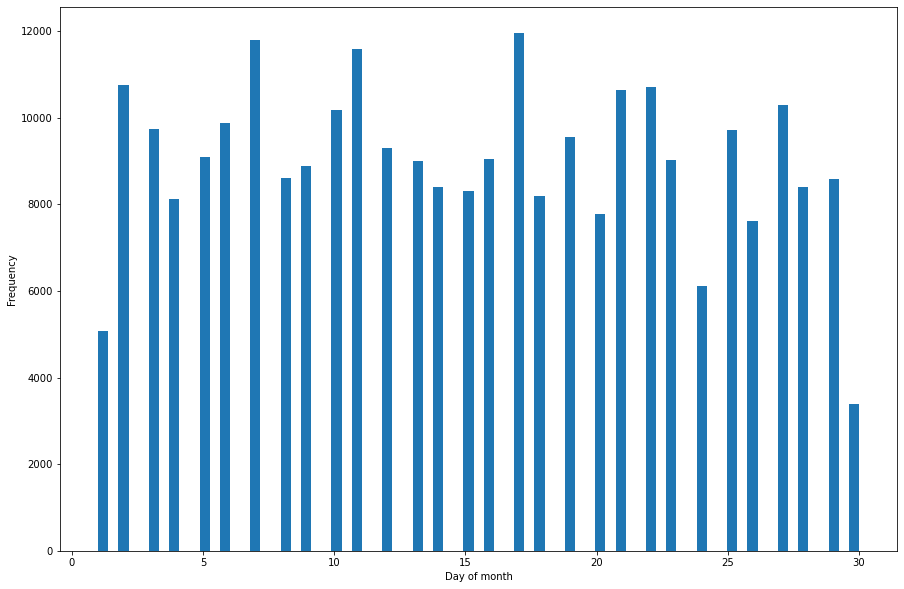

In [17]:
fig=plt.figure(figsize=(15,10))
df['day_of_month'].plot.hist(bins=75)
plt.xlabel('Day of month')

First and last day of the month registers lower sales, while few days of the month registers more sales compared to other

Day Of Week

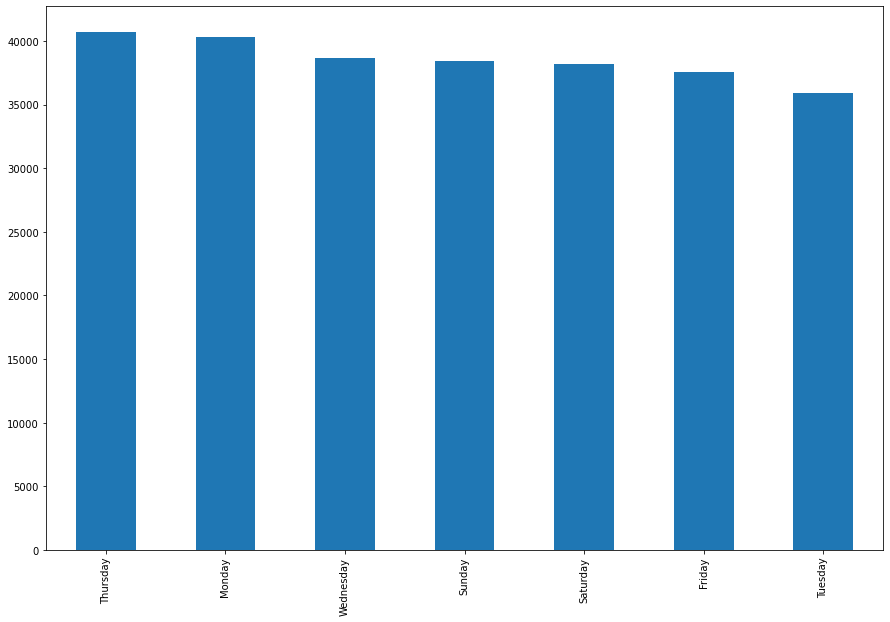

In [18]:
df_day_freq=df['the_day'].value_counts()
fig=plt.figure(figsize=(15, 10))
df_day_freq.plot.bar() 

### Highest Ordered

Most Ordered Products

In [19]:
df['product_name'].value_counts()

Moms Roasted Chicken                           225
Tell Tale Fresh Lima Beans                     219
Steady Whitening Toothpast                     218
Hilltop Silky Smooth Hair Conditioner          216
Steady Childrens Cold Remedy                   214
                                              ... 
Faux Products Silky Smooth Hair Conditioner    132
Choice Bubble Gum                              129
CDR Oregano                                    124
Washington Berry Juice                          85
CDR Apple Preserves                             80
Name: product_name, Length: 1559, dtype: int64

Most Ordered Products in Percentage

In [20]:
df['product_name'].value_counts()/len(df)*100

Moms Roasted Chicken                           0.083420
Tell Tale Fresh Lima Beans                     0.081195
Steady Whitening Toothpast                     0.080825
Hilltop Silky Smooth Hair Conditioner          0.080083
Steady Childrens Cold Remedy                   0.079342
                                                 ...   
Faux Products Silky Smooth Hair Conditioner    0.048940
Choice Bubble Gum                              0.047827
CDR Oregano                                    0.045974
Washington Berry Juice                         0.031514
CDR Apple Preserves                            0.029660
Name: product_name, Length: 1559, dtype: float64

Most Visited Departments

In [21]:
df['department'].value_counts()

Produce                38041
Snack Foods            30983
Household              27590
Frozen Foods           27042
Baking Goods           20573
Canned Foods           19090
Dairy                  17195
Health and Hygiene     16643
Beverages              13624
Deli                   12130
Baked Goods             7951
Snacks                  6970
Alcoholic Beverages     6931
Starchy Foods           5198
Periodicals             4318
Eggs                    4099
Breakfast Foods         3462
Canned Products         1779
Meat                    1777
Checkout                1776
Seafood                 1688
Carousel                 860
Name: department, dtype: int64

### Most Visited Departments in Percentage

In [22]:
df['department'].value_counts()/len(df)*100

Produce                14.103886
Snack Foods            11.487098
Household              10.229127
Frozen Foods           10.025953
Baking Goods            7.627540
Canned Foods            7.077710
Dairy                   6.375130
Health and Hygiene      6.170473
Beverages               5.051164
Deli                    4.497256
Baked Goods             2.947872
Snacks                  2.584161
Alcoholic Beverages     2.569702
Starchy Foods           1.927184
Periodicals             1.600919
Eggs                    1.519724
Breakfast Foods         1.283553
Canned Products         0.659573
Meat                    0.658831
Checkout                0.658461
Seafood                 0.625834
Carousel                0.318849
Name: department, dtype: float64

Most Visited Subcategory

In [23]:
df['subcategory'].value_counts()

Fresh Vegetables     20859
Fresh Fruit          11972
Soup                  7919
Cheese                7815
Dried Fruit           7758
                     ...  
Pot Scrubbers          836
Pancakes               828
Fresh Fish             827
Fashion Magazines      824
Sauces                 824
Name: subcategory, Length: 102, dtype: int64

Most Visited Subcategory in Percentage

In [24]:
df['subcategory'].value_counts()/len(df)*100

Fresh Vegetables     7.733576
Fresh Fruit          4.438677
Soup                 2.936008
Cheese               2.897449
Dried Fruit          2.876316
                       ...   
Pot Scrubbers        0.309951
Pancakes             0.306985
Fresh Fish           0.306614
Fashion Magazines    0.305502
Sauces               0.305502
Name: subcategory, Length: 102, dtype: float64

### Graphical Representation of Most Visited Sections

#### Most Visited Department

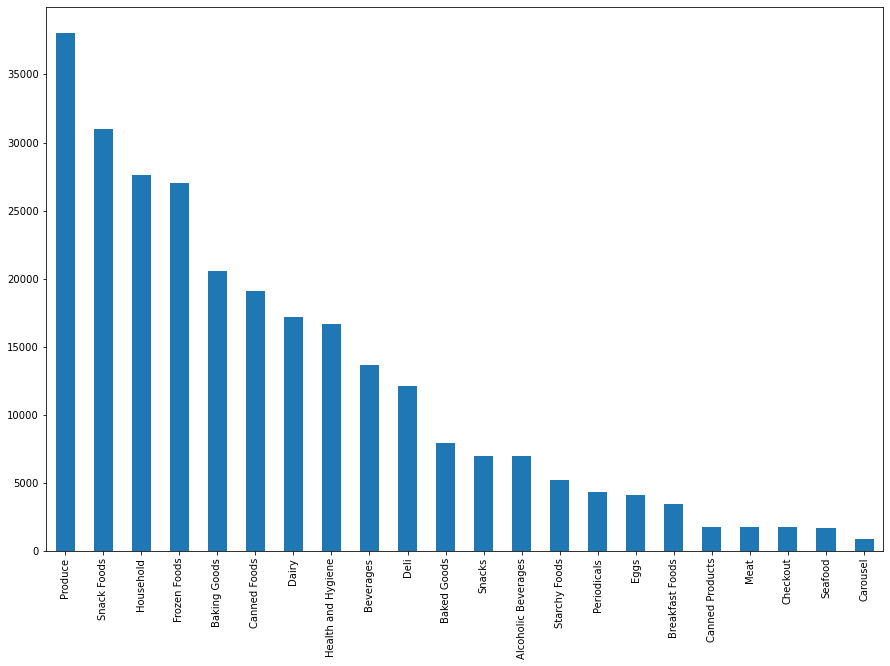

In [25]:
fig=plt.figure(figsize=(15,10))
df['department'].value_counts().plot(kind='bar')

#### 50 Most Visied Subcategories

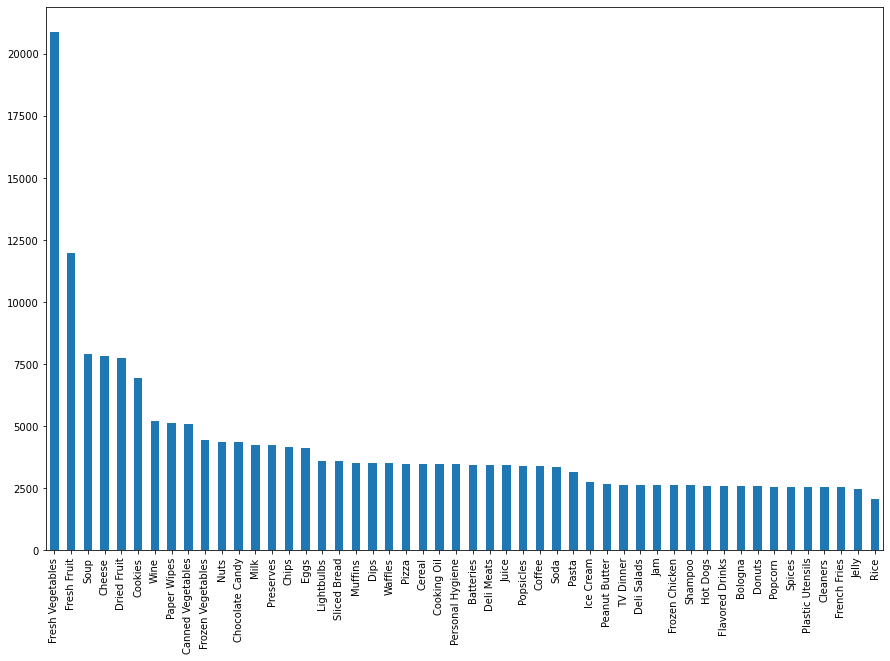

In [26]:
df_subcategory_freq=df['subcategory'].value_counts().iloc[:50]
fig=plt.figure(figsize=(15,10))
df_subcategory_freq.plot.bar()

#### 50 Most Bought Product

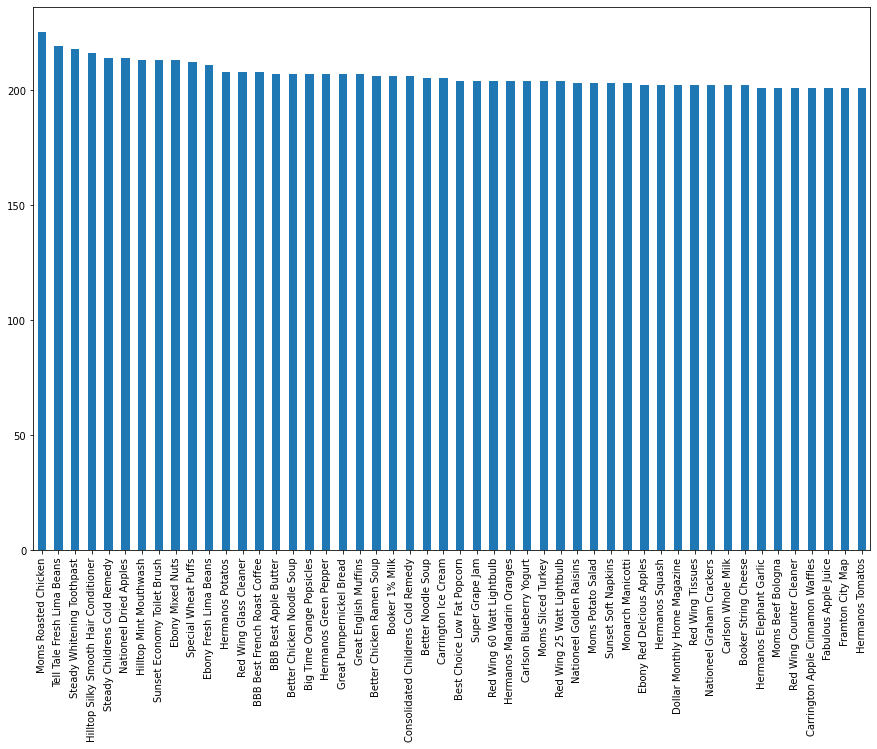

In [27]:
df_freq_products=df['product_name'].value_counts().iloc[:50]
fig=plt.figure(figsize=(15, 10))
df_freq_products.plot.bar()

## Bivariate Analysis

#### Bar Plot between customers and their products per order

In [28]:
unit_per_customer=df.groupby('customer_id')['unit_sales'].count()
unit_per_customer.head()

customer_id
3    30
5     1
6    16
8    42
9    13
Name: unit_sales, dtype: int64

segregating the units sold range to check the count of customers in different range of units

In [29]:
unit_sold_count = {}
for i in range(10):
    unit_sold_count[str(10*i)+'~'+str(10*(i+1))]=len([x for x in list(unit_per_customer) if x>=i*10 and x<(i+1)*10])
    
unit_sold_count

{'0~10': 2145,
 '10~20': 2509,
 '20~30': 1510,
 '30~40': 760,
 '40~50': 454,
 '50~60': 276,
 '60~70': 244,
 '70~80': 175,
 '80~90': 160,
 '90~100': 110}

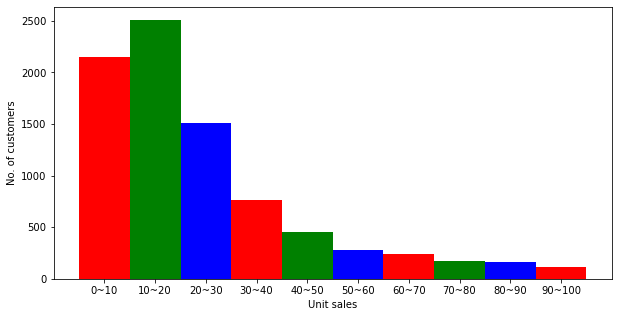

In [30]:
fig = plt.figure(figsize = (10, 5)) 
x_axis = tuple(unit_sold_count.keys())
y_axis = tuple(unit_sold_count.values())
plt.bar(x_axis, y_axis, color='rgb',width=1)  
plt.xlabel('Unit sales')  
plt.ylabel("No. of customers") 
plt.show()

Maximum of customers seems to purchase 10-20 no of products

#### Transaction ID -  transaction id which denotes items in a basket

Since in original dataset there is not transaction id is availabe, which will help to check the products purchased in a single transaction, lets create a transaction id using customer_id and time_id

In [31]:
df['transaction_id'] = df['customer_id'].astype(str) + df['time_id'].astype(str)

In [32]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,...,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch,transaction_id
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,...,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973,6280371
1,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,...,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973,4018371
2,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,...,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973,6280371
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,...,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973,4018371
4,483,371,4382,2,3.88,1.7072,2,Anacortes,WA,USA,...,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973,4382371


In [33]:
df['customer_id'].nunique()

8842

In [34]:
df['time_id'].nunique()

673

In [35]:
df['transaction_id'].nunique()

58308

Since our dataset is large, and considering the market basket analysis lets create a separate dataframe of relevent columns only

Lets get the column transaction_id, customer_id, product_id, product_name to a new dataframe

In [36]:
order_data=df[['transaction_id', 'customer_id', 'product_id', 'product_name']]

In [37]:
order_data.head()

,transaction_id,customer_id,product_id,product_name
0,6280371,6280,337,Better Turkey Noodle Soup
1,4018371,4018,963,Just Right Chicken Noodle Soup
2,6280371,6280,1512,Jardon Spaghetti
3,4018371,4018,181,High Top Lettuce
4,4382371,4382,483,Tell Tale Corn on the Cob


In [38]:
order_data.nunique()

transaction_id    58308
customer_id        8842
product_id         1559
product_name       1559
dtype: int64

#### let's calculate average products bought by customer per order

In [39]:
temp_1=order_data.groupby('transaction_id')['product_id'].count()

In [40]:
temp_1=pd.DataFrame(temp_1)

In [41]:
temp_1.shape

(58308, 1)

In [42]:
temp_1['transaction_id']=list(temp_1.index)

In [43]:
temp_1.columns=['product_num','orderid']

In [44]:
temp_2=pd.merge(temp_1,df[['transaction_id','customer_id']],on='transaction_id',how='left')

In [45]:
order_per_customer=temp_2.groupby('customer_id')['product_num'].agg(['sum','count'])

In [46]:
order_per_customer['avg']=order_per_customer['sum']/order_per_customer['count']

In [47]:
order_per_customer.head()

,sum,count,avg
customer_id,,,
3,186,30,6.200000
5,1,1,1.000000
6,72,16,4.500000
8,208,42,4.952381
9,85,13,6.538462


Here we can see customer_id, then total no of items purchased in sum column, then count gives the number of visit of that customer and average is calculated, which gives the approximate quantity purchased by customer every visit

#### Let's check department wise featured products

In [48]:
department_data=df[['product_id','subcategory','department','product_name']]

In [49]:
department_data.head()

,product_id,subcategory,department,product_name
0,337,Soup,Canned Foods,Better Turkey Noodle Soup
1,963,Soup,Canned Foods,Just Right Chicken Noodle Soup
2,1512,Pasta,Starchy Foods,Jardon Spaghetti
3,181,Fresh Vegetables,Produce,High Top Lettuce
4,483,Fresh Vegetables,Produce,Tell Tale Corn on the Cob


List of Departments and count of sales

In [50]:
department_sales=department_data.groupby('department')['department'].count()

In [51]:
department_sales

department
Alcoholic Beverages     6931
Baked Goods             7951
Baking Goods           20573
Beverages              13624
Breakfast Foods         3462
Canned Foods           19090
Canned Products         1779
Carousel                 860
Checkout                1776
Dairy                  17195
Deli                   12130
Eggs                    4099
Frozen Foods           27042
Health and Hygiene     16643
Household              27590
Meat                    1777
Periodicals             4318
Produce                38041
Seafood                 1688
Snack Foods            30983
Snacks                  6970
Starchy Foods           5198
Name: department, dtype: int64

#### Lets explore top 5 department and their top 5 products which contributes to maximum sales

#### #1 Produce Department

In [52]:
produce=department_data.loc[department_data['department'] == 'Produce']
produce.head()

,product_id,subcategory,department,product_name
3,181,Fresh Vegetables,Produce,High Top Lettuce
4,483,Fresh Vegetables,Produce,Tell Tale Corn on the Cob
18,1123,Fresh Vegetables,Produce,Tri-State Potatos
19,804,Fresh Vegetables,Produce,Ebony Elephant Garlic
20,1426,Fresh Vegetables,Produce,Hermanos Prepared Salad


#### #1 Produce : Top 5 products solds

In [53]:
produce['product_name'].value_counts().iloc[:5]

Tell Tale Fresh Lima Beans    219
Ebony Mixed Nuts              213
Ebony Fresh Lima Beans        211
Hermanos Potatos              208
Hermanos Green Pepper         207
Name: product_name, dtype: int64

#### #2 Snack Foods : Top 5 products solds

In [54]:
snack=department_data.loc[department_data['department'] == 'Snack Foods']
snack['product_name'].value_counts().iloc[:5]

Nationeel Dried Apples         214
Best Choice Low Fat Popcorn    204
Nationeel Golden Raisins       203
Nationeel Graham Crackers      202
Fast Beef Jerky                198
Name: product_name, dtype: int64

#### #3 Household : Top 5 products solds

In [55]:
household=department_data.loc[department_data['department'] == 'Household']
household['product_name'].value_counts().iloc[:5]

Sunset Economy Toilet Brush    213
Red Wing Glass Cleaner         208
Red Wing 60 Watt Lightbulb     204
Red Wing 25 Watt Lightbulb     204
Sunset Soft Napkins            203
Name: product_name, dtype: int64

#### #4 Frozen Foods : Top 5 products solds

In [56]:
frozen=department_data.loc[department_data['department'] == 'Frozen Foods']
frozen['product_name'].value_counts().iloc[:5]

Big Time Orange Popsicles            207
Carrington Ice Cream                 205
Carrington Apple Cinnamon Waffles    201
Big Time Chicken TV Dinner           201
Carrington Beef TV Dinner            200
Name: product_name, dtype: int64

#### #5 Baking Goods : Top 5 products solds

In [57]:
baking=department_data.loc[department_data['department'] == 'Baking Goods']
baking['product_name'].value_counts().iloc[:5]

BBB Best Apple Butter        207
Super Grape Jam              204
Landslide Strawberry Jam     198
BBB Best Strawberry Jelly    198
Super Strawberry Jelly       197
Name: product_name, dtype: int64

## Market Basket Analysis

In [58]:
import pandas as pd 
import numpy as np 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

#### Since dataset having numerous features, we will consider only relevant features here

In [59]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,...,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch,transaction_id
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,...,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973,6280371
1,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,...,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973,4018371
2,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,...,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973,6280371
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,...,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973,4018371
4,483,371,4382,2,3.88,1.7072,2,Anacortes,WA,USA,...,North West,USA,111,05-01-1997,Sunday,1997,1,5,33973,4382371


In [60]:
data=df[['transaction_id','customer_id','product_id','product_name','unit_sales','time_id']]

In [61]:
data.head()

,transaction_id,customer_id,product_id,product_name,unit_sales,time_id
0,6280371,6280,337,Better Turkey Noodle Soup,2,371
1,4018371,4018,963,Just Right Chicken Noodle Soup,1,371
2,6280371,6280,1512,Jardon Spaghetti,3,371
3,4018371,4018,181,High Top Lettuce,3,371
4,4382371,4382,483,Tell Tale Corn on the Cob,2,371


##### Counting number of transactions completed for each products

In [62]:
data.nunique()

transaction_id    58308
customer_id        8842
product_id         1559
product_name       1559
unit_sales            6
time_id             673
dtype: int64

In [63]:
data.describe()

,customer_id,product_id,unit_sales,time_id
count,269720.000000,269720.000000,269720.000000,269720.000000
mean,5119.390405,783.862873,3.090201,800.004990
std,2901.883077,447.926131,0.835554,201.955563
min,3.000000,1.000000,1.000000,367.000000
25%,2570.000000,396.000000,3.000000,657.000000
50%,5090.000000,787.000000,3.000000,830.000000
75%,7614.000000,1174.000000,4.000000,968.000000
max,10281.000000,1559.000000,6.000000,1095.000000


In [64]:
trans_per_product = data.groupby("product_id",as_index=False)['transaction_id'].count()

In [65]:
trans_per_product.head()

,product_id,transaction_id
0,1,85
1,2,155
2,3,148
3,4,154
4,5,144


In [66]:
trans_per_product = trans_per_product.sort_values("transaction_id",ascending = False)

In [67]:
trans_per_product.head()

,product_id,transaction_id
381,382,225
501,502,219
425,426,218
1361,1362,216
864,865,214


Lets store top 100 most bought products to a new dataframe

In [68]:
top_100_products=trans_per_product.head(100)

In [69]:
prod_id = pd.DataFrame(columns=['product_id'], data=top_100_products[['product_id']].values)

##### Orders containting the the most frequently purchased products

In [70]:
MarketBasket = data[0:0]
for i in range(0,99):
    pId = prod_id.iloc[i]['product_id'] 
    val = data[data.product_id == pId ]
    MarketBasket = MarketBasket.append(val,ignore_index = False)

In [71]:
MarketBasket.head()

,transaction_id,customer_id,product_id,product_name,unit_sales,time_id
609,2808742,2808,382,Moms Roasted Chicken,3,742
1981,76462,76,382,Moms Roasted Chicken,3,462
3528,3261062,326,382,Moms Roasted Chicken,1,1062
3680,21731062,2173,382,Moms Roasted Chicken,4,1062
4290,630679,630,382,Moms Roasted Chicken,2,679


In [72]:
MarketBasket.shape

(20049, 6)

In [73]:
MarketBasket.nunique()

transaction_id    16929
customer_id        6270
product_id           99
product_name         99
unit_sales            6
time_id             667
dtype: int64

#### Creating a table for adding all items in a single transaction

The transaction where a product is not purchased will be denoted with zero, while the purchased item will be represented by count of that item

In [74]:
basket = MarketBasket.groupby(['transaction_id','product_name'])['unit_sales'].sum().unstack().reset_index().fillna(0).set_index('transaction_id')

In [75]:
basket.head()

product_name,ADJ Rosy Sunglasses,BBB Best Apple Butter,BBB Best French Roast Coffee,BBB Best Strawberry Jelly,Best Choice Low Fat Popcorn,Better Canned Tuna in Oil,Better Chicken Noodle Soup,Better Chicken Ramen Soup,Better Fancy Canned Anchovies,Better Fancy Canned Clams,...,Sunset Paper Cups,Sunset Paper Plates,Sunset Soft Napkins,Super Grape Jam,Super Strawberry Jelly,Tell Tale Fresh Lima Beans,Tell Tale Lettuce,Tell Tale Sweet Onion,Thresher Malted Milk Balls,Thresher White Chocolate Bar
transaction_id,,,,,,,,,,,,,,,,,,,,,
10000850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10000903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100011011,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10001793,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
basket.shape

(16929, 99)

#### One Hot Encoding

Converted the transaction item count to 1 encoded value (where count of item in a transaction is greater than or equal to 1, and 0 for no purchased item

In [77]:
def oh_encode(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [78]:
basket_encoded = basket.applymap(oh_encode)

In [79]:
basket_encoded.head()

product_name,ADJ Rosy Sunglasses,BBB Best Apple Butter,BBB Best French Roast Coffee,BBB Best Strawberry Jelly,Best Choice Low Fat Popcorn,Better Canned Tuna in Oil,Better Chicken Noodle Soup,Better Chicken Ramen Soup,Better Fancy Canned Anchovies,Better Fancy Canned Clams,...,Sunset Paper Cups,Sunset Paper Plates,Sunset Soft Napkins,Super Grape Jam,Super Strawberry Jelly,Tell Tale Fresh Lima Beans,Tell Tale Lettuce,Tell Tale Sweet Onion,Thresher Malted Milk Balls,Thresher White Chocolate Bar
transaction_id,,,,,,,,,,,,,,,,,,,,,
10000850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100011011,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10001793,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
basket_encoded.shape

(16929, 99)

For smooth running of program lets take 10000 datapoints from 16929 data

In [81]:
#temp=basket_encoded.head(10000)

## Apriori Algorithm

#### Importing Apriori and Association rules Libraries

In [82]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#### Frequent items with support 0.01% using Apriori Algorithm

we are using support as 0.01% since our dataset contains product at macro level, if the category of product is large then we can keep higher value of support

In [83]:
frequent_itemsets = apriori(basket_encoded, min_support=0.0001, use_colnames=True)

In [84]:
frequent_itemsets

,support,itemsets
0,0.011696,(ADJ Rosy Sunglasses)
1,0.012228,(BBB Best Apple Butter)
2,0.012287,(BBB Best French Roast Coffee)
3,0.011696,(BBB Best Strawberry Jelly)
4,0.012050,(Best Choice Low Fat Popcorn)
...,...,...
994,0.000118,"(Red Wing 60 Watt Lightbulb, Hilltop Extra Moi..."
995,0.000118,"(Skinner Strawberry Drink, Hilltop Extra Moist..."
996,0.000118,"(Monarch Rice Medly, Mighty Good Monthly Sport..."
997,0.000118,"(Thresher White Chocolate Bar, Sunset Soft Nap..."


Here we can see, that intially itemset contains only single item, then further it will keep combining different items one by one

#### Association rules using Apriori Algorithm

In [85]:
apriori_rules = association_rules(frequent_itemsets, metric="lift", min_threshold= 1)

In [86]:
apriori_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Better Fancy Canned Clams),(ADJ Rosy Sunglasses),0.011755,0.011696,0.000177,0.015075,1.288945,0.000040,1.003431
1,(ADJ Rosy Sunglasses),(Better Fancy Canned Clams),0.011696,0.011755,0.000177,0.015152,1.288945,0.000040,1.003449
2,(Big Time Frozen Broccoli),(ADJ Rosy Sunglasses),0.011814,0.011696,0.000177,0.015000,1.282500,0.000039,1.003354
3,(ADJ Rosy Sunglasses),(Big Time Frozen Broccoli),0.011696,0.011814,0.000177,0.015152,1.282500,0.000039,1.003389
4,(Carlson Buttermilk),(ADJ Rosy Sunglasses),0.011755,0.011696,0.000177,0.015075,1.288945,0.000040,1.003431
...,...,...,...,...,...,...,...,...,...
1159,"(Just Right Chicken Ramen Soup, Thresher Malte...","(Great Pumpernickel Bread, Carlson Jack Cheese)",0.000295,0.000354,0.000177,0.600000,1692.900000,0.000177,2.499114
1160,(Great Pumpernickel Bread),"(Carlson Jack Cheese, Just Right Chicken Ramen...",0.012228,0.000177,0.000177,0.014493,81.782609,0.000175,1.014526
1161,(Carlson Jack Cheese),"(Great Pumpernickel Bread, Just Right Chicken ...",0.011696,0.000177,0.000177,0.015152,85.500000,0.000175,1.015205
1162,(Just Right Chicken Ramen Soup),"(Great Pumpernickel Bread, Carlson Jack Cheese...",0.011637,0.000177,0.000177,0.015228,85.934010,0.000175,1.015284


#### Filtering out co-realted products with higher Probability

In [87]:
apriori_rules[ (apriori_rules['lift'] >= 50) & (apriori_rules['confidence'] >= 0.01) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
899,"(Carlson Head Cheese, Monarch Manicotti)",(BBB Best Apple Butter),0.000177,0.012228,0.000118,0.666667,54.521739,0.000116,2.963317
904,"(BBB Best Apple Butter, Thresher White Chocola...",(Hermanos Elephant Garlic),0.000177,0.011873,0.000118,0.666667,56.149254,0.000116,2.964381
906,"(Thresher White Chocolate Bar, Hermanos Elepha...",(BBB Best Apple Butter),0.000177,0.012228,0.000118,0.666667,54.521739,0.000116,2.963317
910,"(Fast Beef Jerky, Carrington Ice Cream)",(BBB Best French Roast Coffee),0.000236,0.012287,0.000177,0.750000,61.042067,0.000174,3.950854
912,"(Carrington Ice Cream, BBB Best French Roast C...",(Fast Beef Jerky),0.000236,0.011696,0.000177,0.750000,64.125000,0.000174,3.953216
...,...,...,...,...,...,...,...,...,...
1159,"(Just Right Chicken Ramen Soup, Thresher Malte...","(Great Pumpernickel Bread, Carlson Jack Cheese)",0.000295,0.000354,0.000177,0.600000,1692.900000,0.000177,2.499114
1160,(Great Pumpernickel Bread),"(Carlson Jack Cheese, Just Right Chicken Ramen...",0.012228,0.000177,0.000177,0.014493,81.782609,0.000175,1.014526
1161,(Carlson Jack Cheese),"(Great Pumpernickel Bread, Just Right Chicken ...",0.011696,0.000177,0.000177,0.015152,85.500000,0.000175,1.015205
1162,(Just Right Chicken Ramen Soup),"(Great Pumpernickel Bread, Carlson Jack Cheese...",0.011637,0.000177,0.000177,0.015228,85.934010,0.000175,1.015284


In [88]:
apriori_rules.shape

(1164, 9)

## Now using the rule generated above lets create a recommendations system

In [89]:
def recommendations_using_Apriori(item):
    recommend = []
    for i in range(0,1164):
        if item == apriori_rules.iloc[i,0]:
            recommend.append(apriori_rules.iloc[i,1])
    return recommend

Now, lets check recommendations with top selling products of different categories indentified earlier

#### 5 Recommendations with BBB Best Apple Butter

In [90]:
product_name = {'BBB Best Apple Butter'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'BBB Best Strawberry Jelly'})
frozenset({'Big Time Chicken TV Dinner'})
frozenset({'Carlson Head Cheese'})
frozenset({'Hermanos Elephant Garlic'})
frozenset({'Monarch Manicotti'})


#### 10 Recommendations with Big Time Orange Popsicles

In [91]:
product_name = {'Big Time Orange Popsicles'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:10], sep = "\n")

frozenset({'Better Fancy Canned Anchovies'})
frozenset({'Better Noodle Soup'})
frozenset({'Big Time Pancake Mix'})
frozenset({'Carlson Whole Milk'})
frozenset({'Ebony Mixed Nuts'})
frozenset({'Ebony Squash'})
frozenset({'Fabulous Cranberry Juice'})
frozenset({'Hermanos Mandarin Oranges'})
frozenset({'Hermanos Tomatos'})
frozenset({'Sunset Economy Toilet Brush'})


#### 5 Recommendations with Sunset Economy Toilet Brush

In [92]:
product_name = {'Sunset Economy Toilet Brush'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'Big Time Frozen Broccoli'})
frozenset({'Big Time Orange Popsicles'})
frozenset({'Fantastic Rye Bread'})
frozenset({'Great English Muffins'})
frozenset({'Hermanos Tomatos'})


#### 15 Recommendations with Nationeel Dried Apples

In [93]:
product_name = {'Nationeel Dried Apples'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:15], sep = "\n")

frozenset({'BBB Best French Roast Coffee'})
frozenset({'Booker 1% Milk'})
frozenset({'Fast Beef Jerky'})
frozenset({'Hermanos Elephant Garlic'})
frozenset({'Hermanos Squash'})
frozenset({'Hilltop Extra Moisture Shampoo'})
frozenset({'Moms Beef Bologna'})
frozenset({'Moms Roasted Chicken'})
frozenset({'Nationeel Avocado Dip'})
frozenset({'Nationeel Graham Crackers'})
frozenset({'Nationeel Grape Fruit Roll'})
frozenset({'Sunset Counter Cleaner'})
frozenset({'Hermanos Squash', 'Hilltop Extra Moisture Shampoo'})


#### 5 Recommendations with Tell Tale Fresh Lima Beans

In [94]:
product_name = {'Tell Tale Fresh Lima Beans'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'BBB Best Apple Butter'})
frozenset({'BBB Best Strawberry Jelly'})
frozenset({'Framton City Map'})
frozenset({'Hilltop 200 MG Ibuprofen'})
frozenset({'Steady 200 MG Ibuprofen'})


## Fpgrowth Algorithm

In [95]:
from mlxtend.frequent_patterns import fpgrowth

#### Frequent Items with support 0.001% using Fpgrowth Algorithm

In [96]:
freq_items=fpgrowth(basket_encoded,min_support=.0001,use_colnames=True)

In [97]:
freq_items

,support,itemsets
0,0.011991,(Moms Potato Salad)
1,0.012228,(Great English Muffins)
2,0.011755,(Sunset Large Sponge)
3,0.011755,(Carlson Low Fat String Cheese)
4,0.011873,(Fabulous Apple Juice)
...,...,...
994,0.000118,"(Carrington Ice Cream Sandwich, Carrington App..."
995,0.000118,"(Carrington Ice Cream Sandwich, Sunset Soft Na..."
996,0.000177,"(Monarch Rice Medly, Carrington Ice Cream Sand..."
997,0.000118,"(Moms Sliced Turkey, Carrington Ice Cream Sand..."


## Association Rules using Fpgrowth Algorithm

In [98]:
fpgrowth_rules=association_rules(freq_items,metric="lift",min_threshold=1)

In [99]:
fpgrowth_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Better Chicken Noodle Soup),(Moms Potato Salad),0.012228,0.011991,0.000354,0.028986,2.417220,0.000208,1.017502
1,(Moms Potato Salad),(Better Chicken Noodle Soup),0.011991,0.012228,0.000354,0.029557,2.417220,0.000208,1.017857
2,(Special Wheat Puffs),(Moms Potato Salad),0.012523,0.011991,0.000236,0.018868,1.573473,0.000086,1.007009
3,(Moms Potato Salad),(Special Wheat Puffs),0.011991,0.012523,0.000236,0.019704,1.573473,0.000086,1.007326
4,(Moms Roasted Chicken),(Moms Potato Salad),0.013291,0.011991,0.000177,0.013333,1.111921,0.000018,1.001360
...,...,...,...,...,...,...,...,...,...
1159,(Carrington Ice Cream Sandwich),(Carlson Whole Milk),0.011696,0.011932,0.000177,0.015152,1.269802,0.000038,1.003269
1160,(Hilltop Mint Mouthwash),(Carrington Ice Cream Sandwich),0.012582,0.011696,0.000177,0.014085,1.204225,0.000030,1.002423
1161,(Carrington Ice Cream Sandwich),(Hilltop Mint Mouthwash),0.011696,0.012582,0.000177,0.015152,1.204225,0.000030,1.002609
1162,(Monarch Rice Medly),(Carrington Ice Cream Sandwich),0.011755,0.011696,0.000177,0.015075,1.288945,0.000040,1.003431


#### Recommendations using FPGrowth Algorithm

In [100]:
def recommendations_using_Fpgrowth(item):
    recommend = []
    for i in range(0,1164):
        if item == fpgrowth_rules.iloc[i,0]:
            recommend.append(fpgrowth_rules.iloc[i,1])
    
    return recommend

Again checking the recommendation for the same items, which we used in Apriori algorithm

#### 5 Recommendations with BBB Best Apple Butter

In [101]:
product_name = {'BBB Best Apple Butter'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'BBB Best Strawberry Jelly'})
frozenset({'Tell Tale Fresh Lima Beans'})
frozenset({'Monarch Manicotti'})
frozenset({'Red Wing Plastic Knives'})
frozenset({'Thresher White Chocolate Bar'})


#### 10 Recommendations with Big Time Orange Popsicles

In [102]:
product_name = {'Big Time Orange Popsicles'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:10], sep = "\n")

frozenset({'Big Time Pancake Mix', 'Carlson Low Fat String Cheese'})
frozenset({'Sunset Economy Toilet Brush'})
frozenset({'Ebony Mixed Nuts'})
frozenset({'Carlson Whole Milk'})
frozenset({'Fabulous Cranberry Juice'})
frozenset({'Big Time Pancake Mix'})
frozenset({'Hermanos Tomatos'})
frozenset({'Hermanos Mandarin Oranges'})
frozenset({'Better Noodle Soup'})
frozenset({'Ebony Squash'})


#### 5 Recommendations with Sunset Economy Toilet Brush

In [103]:
product_name = {'Sunset Economy Toilet Brush'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'Great English Muffins'})
frozenset({'Big Time Orange Popsicles'})
frozenset({'Hermanos Tomatos'})
frozenset({'Fantastic Rye Bread'})
frozenset({'Monarch Rice Medly'})


#### 15 Recommendations with Nationeel Dried Apples

In [104]:
product_name = {'Nationeel Dried Apples'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:15], sep = "\n")

frozenset({'BBB Best French Roast Coffee'})
frozenset({'Nationeel Grape Fruit Roll'})
frozenset({'Hilltop Extra Moisture Shampoo'})
frozenset({'Hermanos Squash', 'Hilltop Extra Moisture Shampoo'})
frozenset({'Nationeel Graham Crackers'})
frozenset({'Sunset Counter Cleaner'})
frozenset({'Fast Beef Jerky'})
frozenset({'Moms Roasted Chicken'})
frozenset({'Hermanos Squash'})
frozenset({'Moms Beef Bologna'})
frozenset({'Nationeel Avocado Dip'})
frozenset({'Booker 1% Milk'})
frozenset({'Hermanos Elephant Garlic'})


#### 5 Recommendations with Tell Tale Fresh Lima Beans

In [105]:
product_name = {'Tell Tale Fresh Lima Beans'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'Framton City Map'})
frozenset({'BBB Best Strawberry Jelly'})
frozenset({'BBB Best Apple Butter'})
frozenset({'Steady 200 MG Ibuprofen'})
frozenset({'Hilltop 200 MG Ibuprofen'})


### Apriori Vs  FPGrowth Algorithm

#### Calculating Run Time of Apriori Algorithm

In [106]:
import time
l=[0.01,0.02,0.03,0.04,0.05]
t=[]
for i in l:
    t1=time.time()
    apriori(basket_encoded,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

#### Calculating Run Time of Fpgrowth Algorithm

In [107]:
l=[0.01,0.02,0.03,0.04,0.05]
f=[]
for i in l:
    t1=time.time()
    fpgrowth(basket_encoded,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

### Graph of Run Time between Apriori and FP Growth Algorithm

Text(0, 0.5, 'Run Time in ms')

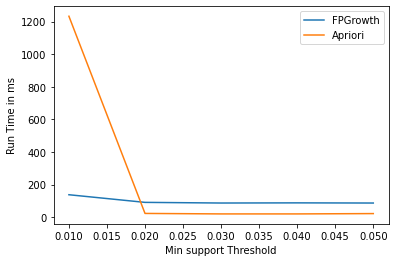

In [108]:
sns.lineplot(x=l,y=f,label="FPGrowth")
sns.lineplot(x=l,y=t,label="Apriori")
plt.xlabel("Min support Threshold")
plt.ylabel("Run Time in ms")

#### Clearly we can see that for low support threshold Apriori takes much more time compared to Fpgrowth